In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *
import json
from time import time
import random

In [4]:
generator = CausalTSGenerator(dimensions=3, max_p=5, data_length=1000,
                              incoming_edges=2, autocorrelation=0.7)
ts = generator.generate()

<function matplotlib.pyplot.show(*args, **kw)>

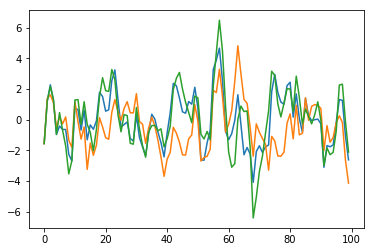

In [5]:
plt.plot(ts[:100])
plt.show

In [6]:
cross_correlation(ts)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


array([[ 1.00000000e+00,  6.57671275e-01,  2.79693016e-01, ...,
         1.43619559e-03, -6.88329497e-05, -4.32204782e-04],
       [ 1.00000000e+00,  3.98564703e-01,  1.55018248e-01, ...,
         7.99583619e-03, -1.07439276e-03, -4.24532425e-03],
       [ 1.00000000e+00, -2.24118448e-02, -1.02889813e+00, ...,
         3.75549759e-03, -5.61027138e-05, -1.24800335e-03],
       ...,
       [ 1.00000000e+00, -9.08572915e-02, -1.27284367e+00, ...,
         8.71534385e-03,  4.91143031e-04, -3.39740143e-03],
       [ 1.00000000e+00,  3.38732992e-02, -2.33854286e-01, ...,
         1.10548396e-02, -1.53962854e-03, -6.08364349e-03],
       [ 1.00000000e+00,  7.02044461e-01,  3.39311240e-01, ...,
         1.71557838e-03,  1.83144140e-05, -6.05269752e-04]])

In [8]:
cross_correlation(ts, return_df=True)

/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


,X0 vs X0,X0 vs X1,X1 vs X0,X0 vs X2,X2 vs X0,X1 vs X1,X1 vs X2,X2 vs X1,X2 vs X2
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.657671,0.398565,-0.022412,0.714584,0.677059,0.696602,-0.090857,0.033873,0.702044
2,0.279693,0.155018,-1.028898,0.402083,0.347381,0.502955,-1.272844,-0.233854,0.339311
3,0.108443,0.176012,-1.320200,0.227507,0.210890,0.408767,-1.849975,0.039387,0.127719
4,0.010812,0.365838,-1.361331,-0.004904,0.108527,0.343047,-2.393301,0.582881,-0.048065
5,-0.035821,0.811499,-1.206151,-0.286612,0.017664,0.388334,-3.141137,1.395664,-0.209721
6,-0.114063,0.966280,-1.105656,-0.317098,-0.105084,0.358774,-2.911064,1.644614,-0.181094
7,-0.212358,0.923838,-1.067788,-0.186290,-0.227296,0.279088,-2.032562,1.502968,-0.058536
8,-0.292436,0.755500,-1.004410,-0.083720,-0.307481,0.173896,-1.268334,1.164531,0.005399
9,-0.322041,0.505783,-0.868750,-0.077001,-0.334979,0.054876,-0.871735,0.720527,-0.038209


In [12]:
for i in range(1, 11):
    print(cross_corr_peaks(ts, n_peaks=i))

6
7
9
12
11
46
46
47
217
218


/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


In [13]:
for i in range(1, 11):
    print(cross_corr_peaks(ts, n_peaks=i))

6
7
9
46
47
217
218
219
724
730


/usr/local/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
